In [3]:
# %pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
 
od.download('https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio')

Skipping, found downloaded files in ".\ravdess-emotional-speech-audio" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

# need admin access to librosa
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="darkgrid")

In [5]:
audio_files = glob('ravdess-emotional-speech-audio/Actor_*/*.wav')

In [9]:
ipd.Audio(audio_files[1])

In [14]:
y, sr = librosa.load(audio_files[1]) # load raw values with sampling rate

In [18]:
y,sr

(array([-1.6893897e-06, -1.3083032e-05, -1.8255726e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 22050)

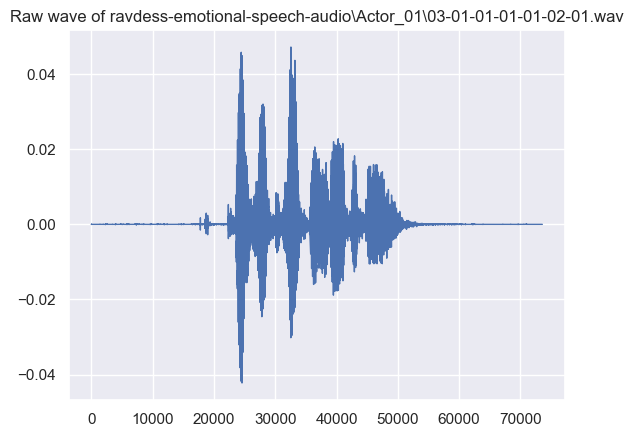

In [27]:
pd.Series(y).plot(lw=1, title='Raw wave of ' + audio_files[1])
plt.show()

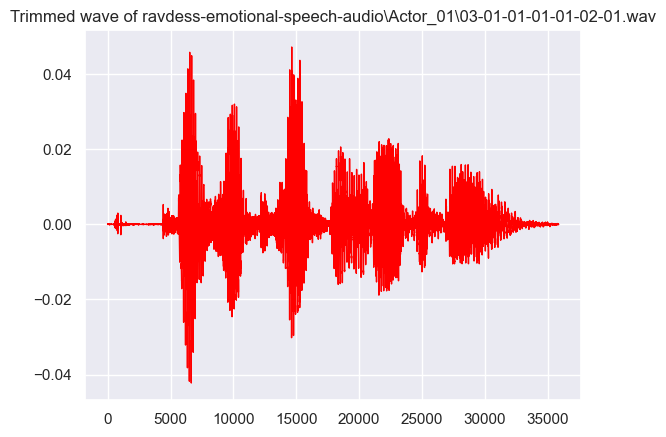

In [40]:
y_trmmed, _ = librosa.effects.trim(y, top_db=40) # trim the raw values
pd.Series(y_trmmed).plot(lw=1, title='Trimmed wave of ' + audio_files[1],  color='red')
plt.show()

<AxesSubplot: title={'center': 'zoomed in'}>

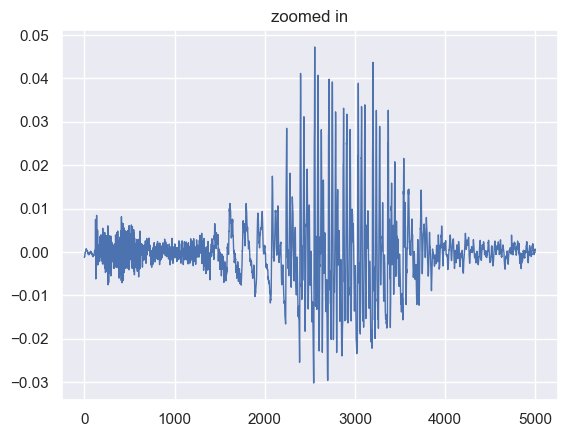

In [43]:
pd.Series(y[30000:35000]).plot(lw=1, title='zoomed in')


### Spectrogram

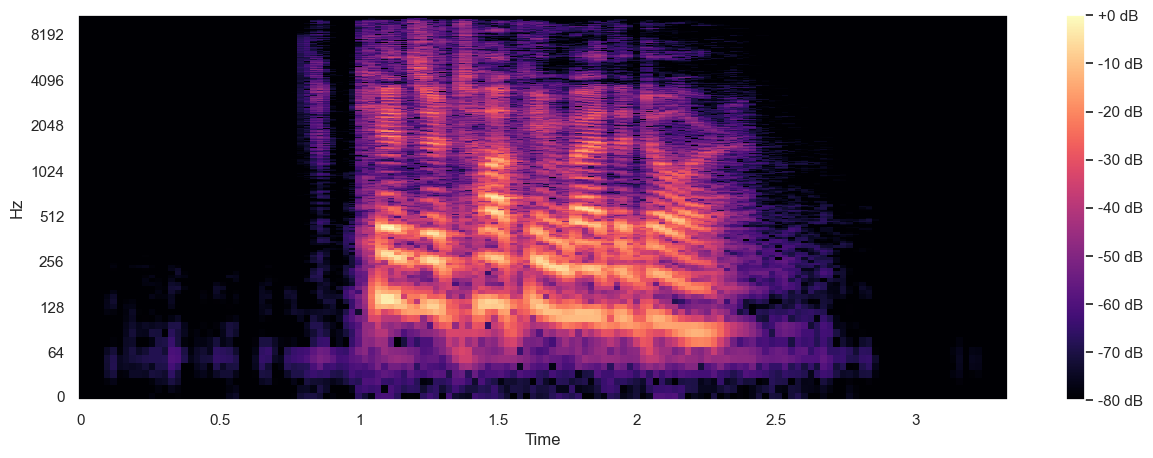

In [52]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

#plot
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')

## Mel Spectrogram

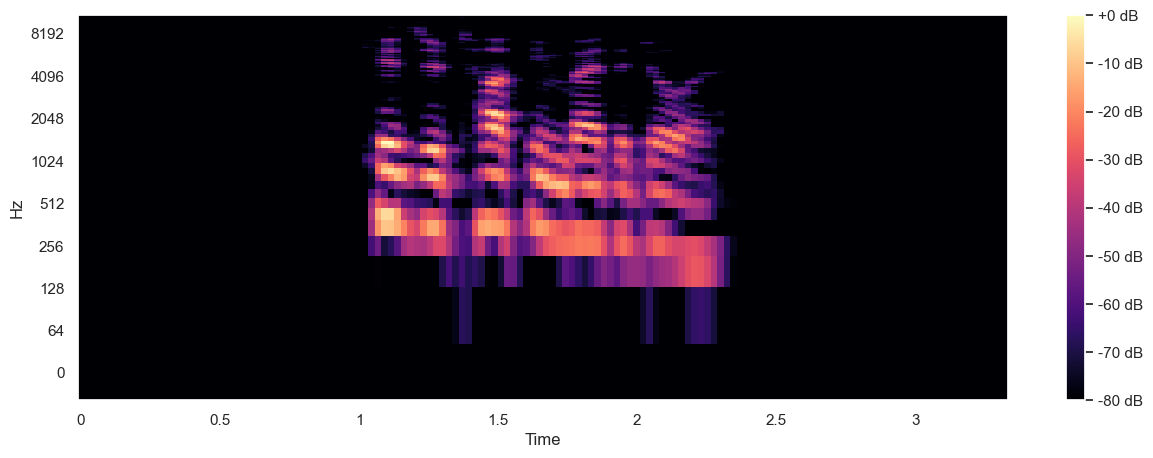

In [57]:
S = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), ref=np.max)

#plot
plt.figure(figsize=(15, 5))
librosa.display.specshow(S, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')